In [1]:
import numpy as np
import matplotlib.pyplot as plt

import aurel
from aurel.solutions import LCDM as sol
#from aurel.solutions import EdS as sol
from aurel.solutions import ICPertFLRW as IC

In [2]:
# Define grid and classes
L = 1821
N = 64
grid = {
    't': 1.0,
    'Lx' : L, 'Ly' : L, 'Lz' : L,
    'xmin': -L / 2, 'ymin': -L / 2, 'zmin': -L / 2,
    'Nx' : N, 'Ny' : N, 'Nz' : N,
    'dx' : L / N, 'dy' : L / N, 'dz' : L / N,
}
fd = aurel.FiniteDifference(grid)
rel = aurel.AurelCore(fd)
rel.Lambda = sol.Lambda # redefine the cosmological constant to match

4th order finite difference schemes are defined


<IPython.core.display.Latex object>

In [3]:
# Define perturbation amplitude and wavelength
amp = [0.01138486133517004756]*3
lamb = [L]*3

# Define initial conditions
Rc = IC.Rc_func(fd.x, fd.y, fd.z, amp, lamb)
rel.data["gammadown3"] = IC.gammadown3(sol, fd, grid['t'], Rc)
rel.data["Kdown3"] = IC.Kdown3(sol, fd, grid['t'], Rc)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Text(0, 0.5, 'y/L')

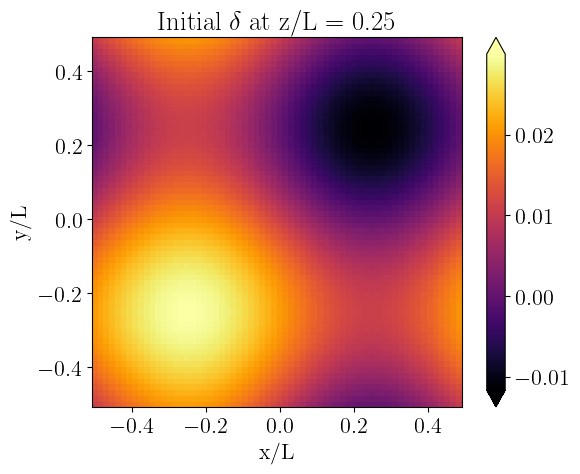

In [4]:
# Calculate nonlinear density contrast
delta = rel["rho_fromHam"] / sol.rho(grid['t']) - 1

# and plot
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    'font.size': 16.0,
})
plt.figure()
plt.pcolor(fd.xarray/L, fd.yarray/L, delta[:, :, int(N/4)], cmap='inferno')
plt.colorbar(extend='both')
plt.gca().set_aspect("equal")
plt.title(r"Initial $\delta$ at z/L = 0.25")
plt.xlabel("x/L")
plt.ylabel("y/L")